# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt

from IPython.display import display

# Active_BBB

In [2]:
#bbb active molecules
active_bbb=pd.read_csv('END_active_BBB.txt',sep='\t')
active_bbb['Activity']=1
active_bbb

,Smiles,name,Activity
0,C1=Cc2c(cccc2OC[C@@H]2CNCCO2)C1,(2s)-2-(1h-inden-4-yloxymethyl)morpholine-B3DB,1
1,O=C(O)[C@@H]1C(=CCO)O[C@H]2CC(=O)N12,"(2s,5s)-3-(2-hydroxyethylidene)-7-oxo-4-oxa-1-...",1
2,C[C@@]12C=CC(=O)C=C1CC[C@H]1[C@H]2[C@H](O)C[C@...,"(8r,9r,10s,11r,13r,14r,17s)-11,17-dihydroxy-17...",1
3,C=CCc1ccccc1OC[C@@H](O)CNC(C)C,(s)-alprenolol-B3DB,1
4,Nc1nc(CC(=O)Nc2ccc(CCNCC(O)c3ccccc3)cc2)cs1,(s)-mirabegron-B3DB,1
...,...,...,...
2373,c1c(Cl)ccc2c1c(no2)C(n1ccnc1)C,zoniclezole,1
2374,Cc1ccc(SCCC(=O)N[C@@H](C)c2ccc(N3CCC[C@@H](C)C...,zonisamide-B3DB,1
2375,c1c(Cl)ccc2c1C(=Cc1c(S2)cccc1)OCCN(C)C,zotepine,1
2376,CN(C)CCOC1=Cc2cc(Cl)ccc2Sc2ccccc12,zotepine-B3DB,1


# Inactive_BBB

In [3]:
#bbb inactive molecules
inactive_bbb=pd.read_csv('END_inactive_BBB.txt',sep='\t')
inactive_bbb['Activity']=0
inactive_bbb

,Smiles,name,Activity
0,CC[C@@H](C)[C@@H](C(=O)OC1CC[N+](C)(C)CC1)c1cc...,"(1,1-dimethylpiperidin-1-ium-4-yl)-(2r,3r)-3-m...",0
1,CC[N+](C)(CC=CC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)...,"(2-amino-2-oxoethyl)-[3-[(6r,7r)-7-[[2-(5-amin...",0
2,CN(C)[C@@H]1C(=O)C(=C(O)[C@@]2(O)C(=O)C3=C(O)c...,"(4s,4ar,5ar,6s,12ar)-7-chloro-4-(dimethylamino...",0
3,CC(=N)N1CC[C@@H](SC2=C(C(=O)O)N3C(=O)[C@H]([C@...,"(5r,6s)-3-[(3r)-1-ethanimidoylpyrrolidin-3-yl]...",0
4,Cc1ccccc1N=C1N(C)CCN1C,"1,3-dimethyl-2-(2-methylphenylimino)imidazolidine",0
...,...,...,...
1594,CC(=O)Oc1ccc(/C=C/C(=O)NCCc2ccccc2)cc1OC(=O)C,y12,0
1595,O=C(O)c1nc2ccc(C(F)(F)F)cc2nc1NCc1ccc(C(F)(F)F...,y22,0
1596,COC(=O)[C@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5c...,yohimbine,0
1597,S=c1[nH]c(c2ccc(Br)cc2)cs1,zoledronicacid,0


# merging datasets

In [4]:
frames = [active_bbb,inactive_bbb]

mer_data = pd.concat(frames)

In [5]:
mer_data= mer_data.dropna().reset_index(drop=True)
mer_data

,Smiles,name,Activity
0,C1=Cc2c(cccc2OC[C@@H]2CNCCO2)C1,(2s)-2-(1h-inden-4-yloxymethyl)morpholine-B3DB,1
1,O=C(O)[C@@H]1C(=CCO)O[C@H]2CC(=O)N12,"(2s,5s)-3-(2-hydroxyethylidene)-7-oxo-4-oxa-1-...",1
2,C[C@@]12C=CC(=O)C=C1CC[C@H]1[C@H]2[C@H](O)C[C@...,"(8r,9r,10s,11r,13r,14r,17s)-11,17-dihydroxy-17...",1
3,C=CCc1ccccc1OC[C@@H](O)CNC(C)C,(s)-alprenolol-B3DB,1
4,Nc1nc(CC(=O)Nc2ccc(CCNCC(O)c3ccccc3)cc2)cs1,(s)-mirabegron-B3DB,1
...,...,...,...
3972,CC(=O)Oc1ccc(/C=C/C(=O)NCCc2ccccc2)cc1OC(=O)C,y12,0
3973,O=C(O)c1nc2ccc(C(F)(F)F)cc2nc1NCc1ccc(C(F)(F)F...,y22,0
3974,COC(=O)[C@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5c...,yohimbine,0
3975,S=c1[nH]c(c2ccc(Br)cc2)cs1,zoledronicacid,0


In [6]:
mer_data_a=mer_data[['Smiles','Activity']]
mer_data_a

,Smiles,Activity
0,C1=Cc2c(cccc2OC[C@@H]2CNCCO2)C1,1
1,O=C(O)[C@@H]1C(=CCO)O[C@H]2CC(=O)N12,1
2,C[C@@]12C=CC(=O)C=C1CC[C@H]1[C@H]2[C@H](O)C[C@...,1
3,C=CCc1ccccc1OC[C@@H](O)CNC(C)C,1
4,Nc1nc(CC(=O)Nc2ccc(CCNCC(O)c3ccccc3)cc2)cs1,1
...,...,...
3972,CC(=O)Oc1ccc(/C=C/C(=O)NCCc2ccccc2)cc1OC(=O)C,0
3973,O=C(O)c1nc2ccc(C(F)(F)F)cc2nc1NCc1ccc(C(F)(F)F...,0
3974,COC(=O)[C@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5c...,0
3975,S=c1[nH]c(c2ccc(Br)cc2)cs1,0


# Saving data as .smi file for fingerprint calculation

In [7]:
mer_data_a.to_csv('mer_bbb_data.smi', sep='\t', index=False, header=False)


# opening fingerprint calculation output (done externaly)

In [8]:
data_bbb=pd.read_csv('mer_bbb_data_out.csv',sep=',')
data_bbb

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3972,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3973,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3974,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = data_bbb.drop('Name', axis=1)
target = data_bbb['Name']

In [10]:
def remove_low_variance(input_data, threshold):
    """ it returns the new data after filtering but without column names.
    selection.get_support gives me column names  """
    from sklearn.feature_selection import VarianceThreshold
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

def runModel(data, target, thresholdVariance, colRetainedFilename, pickleFileName, algo):

    import pickle
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    from xgboost.sklearn import XGBClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.model_selection import StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    
    
    data_clean = remove_low_variance(data, threshold=thresholdVariance)
    
    colsRetained = pd.DataFrame.from_dict({"ColsRetained" : data_clean.columns.tolist()})
    colsRetained.to_csv(colRetainedFilename, sep=";", index=False)
    
    X_train, X_test, y_train, y_test = train_test_split(data_clean, target, test_size=0.3, random_state=42,stratify=target)
    
    if algo == "rf":
        clf=RandomForestClassifier()
        param_grid = { 
            'n_estimators': range(100,500,10),
            'max_depth' : range(1,7,1),
            'random_state': [42] ,
            'criterion':["gini"],#, "entropy"],,
            'max_features':["auto"]#, "sqrt", "log2"] 
        }
    elif algo == "xgb":
        clf = XGBClassifier()
        param_grid = { 
            'n_estimators': range(5, 31, 5),
            'max_depth' : range(1,5,1),
            'random_state': [42] ,
            'learning_rate': [0.01],
            "objective":['binary:logistic']
        }        
    
    kfold = StratifiedKFold(n_splits=3)
    CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kfold, scoring="f1", verbose=1, n_jobs=-1)
    CV_clf.fit(X_train, y_train)

    print("Best Params : ")
    print(CV_clf.best_params_)
    
    if algo == "rf":
        clf1=RandomForestClassifier(**CV_clf.best_params_)
    elif algo == "xgb":
        clf1=XGBClassifier(**CV_clf.best_params_)
    clf1.fit(X_train, y_train)

    print("Save Model : ", pickleFileName)
    with open(pickleFileName,'wb') as f:
        pickle.dump(clf1,f)
    
    y_train_class = clf1.predict(X_train)
    y_test_class = clf1.predict(X_test)
    y_train_proba = clf1.predict_proba(X_train)
    y_test_proba = clf1.predict_proba(X_test)
    
    
    skplt.plotters.plot_roc_curve(y_train, y_train_proba, title="ROC - X_train")
    plt.show()
    skplt.plotters.plot_roc_curve(y_test, y_test_proba, title="ROC - X_test")
    plt.show()
    
    print("Accuracy Train : ", str(accuracy_score(y_train, y_train_class)))
    print("Accuracy Test : ", str(accuracy_score(y_test, y_test_class)))

    skplt.metrics.plot_confusion_matrix(y_train, y_train_class, title="X_train")
    skplt.metrics.plot_confusion_matrix(y_test, y_test_class, title="X_test")

    skplt.metrics.plot_confusion_matrix(y_train, y_train_class, normalize=True,
                                       title="X_train normalized")
    skplt.metrics.plot_confusion_matrix(y_test, y_test_class, normalize=True,
                                       title="X_test normalized")

    print("Classification Report - Train :")
    print(classification_report(y_train, y_train_class))
    print("Classification Report - Test :")
    print(classification_report(y_test, y_test_class))
    
    

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 170, 'random_state': 42}
Save Model :  bbb_data_pubchem_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


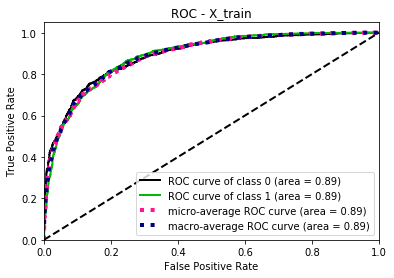

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


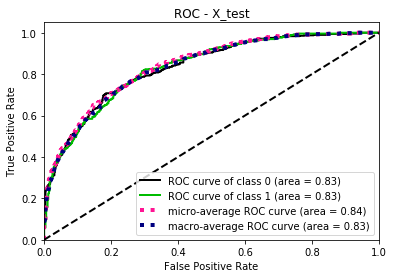

Accuracy Train :  0.7998562702120015
Accuracy Test :  0.7493713327745181
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      1119
           1       0.78      0.93      0.85      1664

    accuracy                           0.80      2783
   macro avg       0.82      0.77      0.78      2783
weighted avg       0.81      0.80      0.79      2783

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.78      0.52      0.63       479
           1       0.74      0.90      0.81       714

    accuracy                           0.75      1193
   macro avg       0.76      0.71      0.72      1193
weighted avg       0.76      0.75      0.74      1193



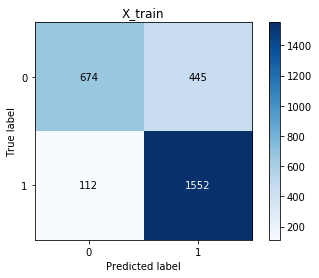

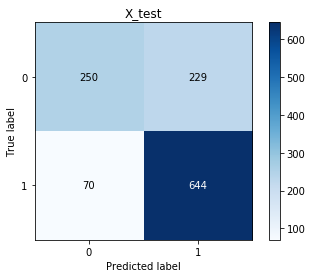

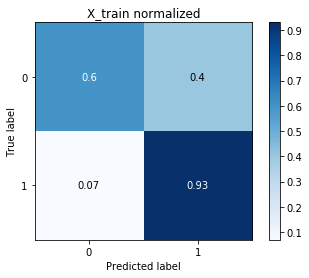

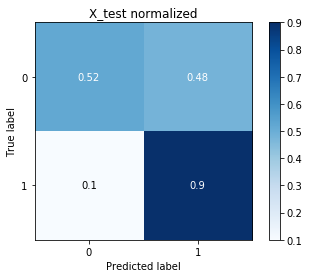

In [11]:
runModel(data, target, 0.1, 'bbb_pubchem_colsRetained_rf.csv', 'bbb_data_pubchem_rf.pkl', algo="rf")    

# Y Scrambling

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Save Model :  bbb_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


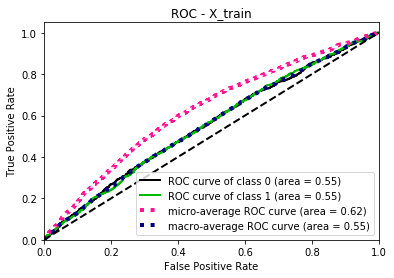

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


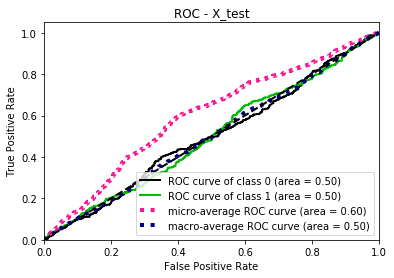

Accuracy Train :  0.5979159180740209
Accuracy Test :  0.5984911986588433
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1119
           1       0.60      1.00      0.75      1664

    accuracy                           0.60      2783
   macro avg       0.30      0.50      0.37      2783
weighted avg       0.36      0.60      0.45      2783

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       479
           1       0.60      1.00      0.75       714

    accuracy                           0.60      1193
   macro avg       0.30      0.50      0.37      1193
weighted avg       0.36      0.60      0.45      1193



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 360, 'random_state': 42}
Save Model :  bbb_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


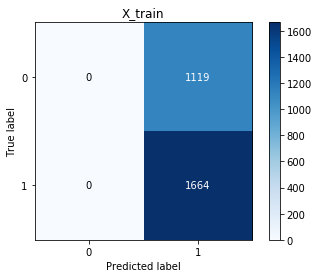

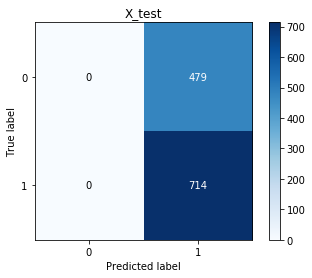

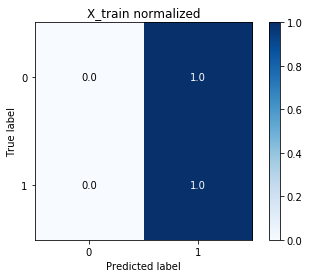

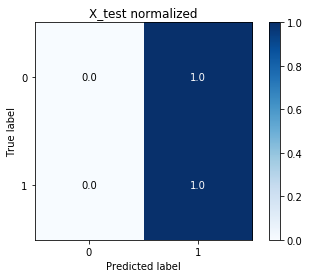

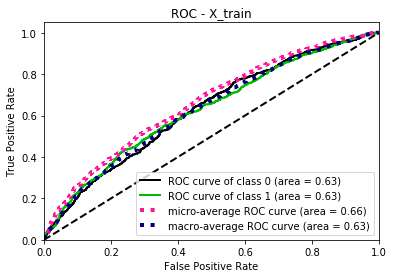

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


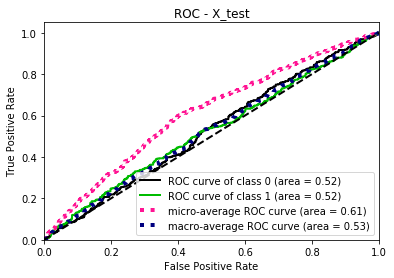

Accuracy Train :  0.5979159180740209
Accuracy Test :  0.5984911986588433
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1119
           1       0.60      1.00      0.75      1664

    accuracy                           0.60      2783
   macro avg       0.30      0.50      0.37      2783
weighted avg       0.36      0.60      0.45      2783

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       479
           1       0.60      1.00      0.75       714

    accuracy                           0.60      1193
   macro avg       0.30      0.50      0.37      1193
weighted avg       0.36      0.60      0.45      1193



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Save Model :  bbb_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


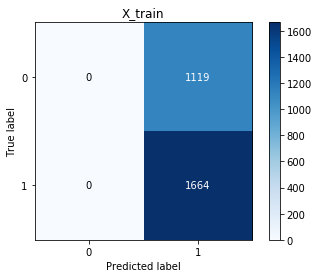

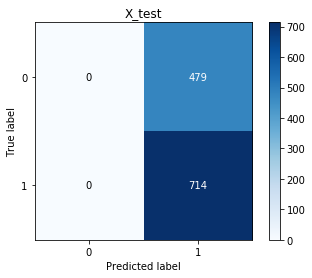

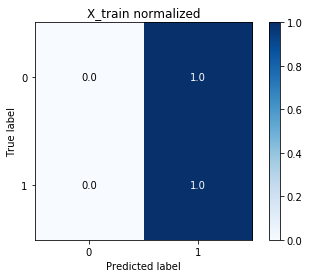

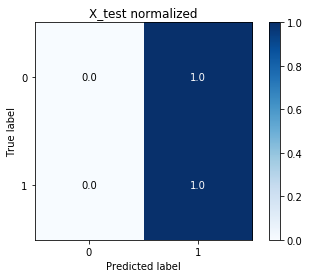

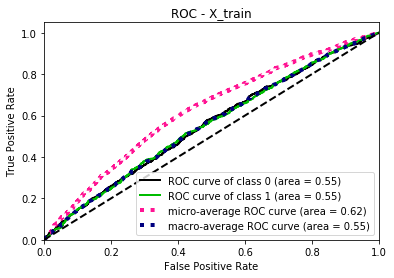

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


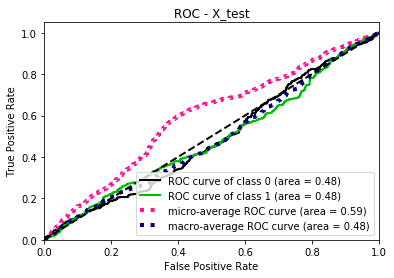

Accuracy Train :  0.5979159180740209
Accuracy Test :  0.5984911986588433
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1119
           1       0.60      1.00      0.75      1664

    accuracy                           0.60      2783
   macro avg       0.30      0.50      0.37      2783
weighted avg       0.36      0.60      0.45      2783

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       479
           1       0.60      1.00      0.75       714

    accuracy                           0.60      1193
   macro avg       0.30      0.50      0.37      1193
weighted avg       0.36      0.60      0.45      1193



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

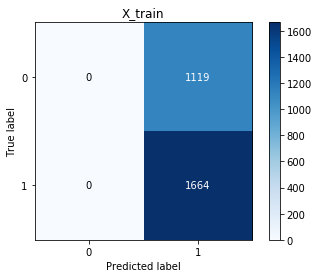

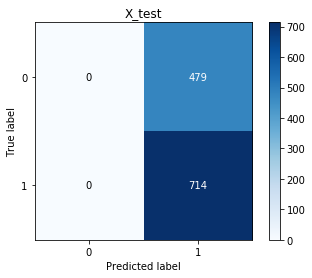

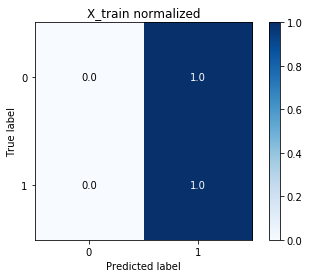

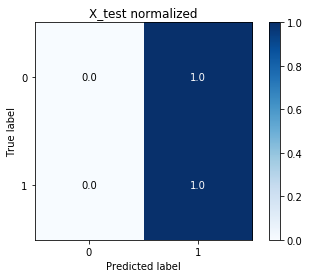

In [12]:
for _ in range(3):
    np.random.shuffle(target)
    runModel(data, target, 0.1, 'bbb_pubchem_yscram_colsRetained_rf.csv', 'bbb_data_pubchem_yscram_rf.pkl', algo="rf")    